In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


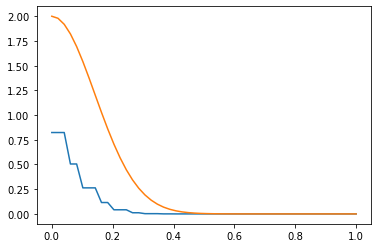

In [3]:
N = 200000
n = 20

M = np.random.binomial(1,0.5,(N,n))
E_M = np.sum(M,axis=1) * (1/n)
e = np.linspace(0,1,50)

p =  np.sum([abs(E_M_i-0.5)>e  for E_M_i in E_M], axis=0) * 1/N
h =  2*np.exp(-2*50*np.power(e,2)/4)

fig, ax = plt.subplots()
ax.plot(e,p)
ax.plot(e,h)

plt.savefig('1.png')


In [131]:
mnist = fetch_openml('mnist_784', as_frame=False)
data = mnist['data']
labels = mnist['target']

In [132]:
import numpy.random
idx = numpy.random.RandomState(0).choice(70000,11000)
train = data[idx[:10000], :].astype(int)
train_labels = labels[idx[:10000]]
test = data[idx[10000:],:].astype(int)
test_labels = labels[idx[10000:]]


In [133]:
import sklearn as sk
from scipy.stats import mode
from numpy import linalg as LA
sk.__version__

'1.0.2'

In [134]:
def kNN(train, train_labels, I, k):
    d = LA.norm(train - I, axis=1)
    d = train_labels[np.argpartition(d,k)[:k]]
    return np.random.choice(mode(d).mode)

'3'

In [136]:
correct = 0

for i in range(0,1000):
    prediction = kNN(train, train_labels, test[i], 10)
    correct += 1 if prediction == test_labels[i] else 0

print(correct/1000)

0.929

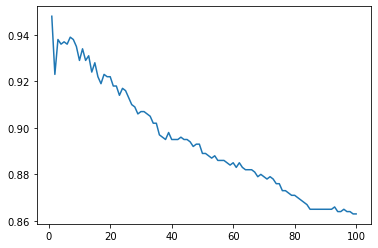

In [137]:
max_k = 100
samples=1000

correct = np.zeros(max_k)
x_labels = np.arange(1,max_k+1)


for k in range(1,max_k+1):
    for i in range(0,samples):
        prediction = kNN(train, train_labels, test[i], k)
        correct[k-1] += 1 if prediction == test_labels[i] else 0


correct = correct/samples
fig, ax = plt.subplots()
ax.plot(x_labels, correct)

plt.savefig('2c.png')


(50,)


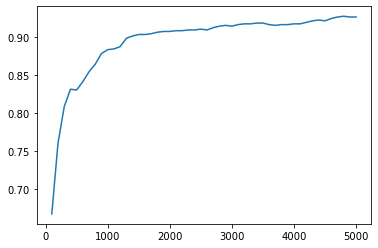

In [138]:
N = 5000
samples=1000

correct = np.zeros(50)
x_labels = np.arange(100,N+1,N/50)

print(x_labels.shape)

for n in range(100,N+1,N//50):
    for i in range(0,samples):
        prediction = kNN(train[:n], train_labels[:n], test[i], 1)
        correct[(n-100)//(N//50)] += 1 if prediction == test_labels[i] else 0


correct = correct/samples
fig, ax = plt.subplots()
ax.plot(x_labels,correct)

plt.savefig('2d.png')
